# Number of SUBE Transactions (uses) per Day (2020–2025)

The datasets contain daily records of SUBE smart card transactions in Argentina between 2020 and 2025. They provide detailed information about transport usage across different modes (bus, train, subway, and boats), companies, and lines. Each entry includes the date, company name, line description, jurisdiction (national, provincial, or municipal), and whether the service operates within the AMBA region. Additional fields specify the province or municipality when applicable, the total number of validated transactions (net of reversals), and whether the data is preliminary. This structure allows for a comprehensive analysis of mobility patterns and public transport demand at multiple geographic and administrative levels.

In [5]:
# paths
path = 'G:/Mi unidad/Analisis de datos/SUBE/datasets'

In [6]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [7]:
# find all datasets in folder
all_files = glob.glob(os.path.join(path, '*.csv'))

In [8]:
# read and concat all datasets in a dataframe
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

print('Number of file loaded: ', len(all_files))
print('Shape of dataframe: ', df.shape)

Number of file loaded:  6
Shape of dataframe:  (2538678, 10)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538678 entries, 0 to 2538677
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   DIA_TRANSPORTE   object
 1   NOMBRE_EMPRESA   object
 2   LINEA            object
 3   AMBA             object
 4   TIPO_TRANSPORTE  object
 5   JURISDICCION     object
 6   PROVINCIA        object
 7   MUNICIPIO        object
 8   CANTIDAD         int64 
 9   DATO_PRELIMINAR  object
dtypes: int64(1), object(9)
memory usage: 193.7+ MB


In [10]:
df.head(4)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,175,NO
1,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,14,NO
2,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1811,NO
3,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 720M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,576,NO


In [11]:
# rename columns
df.columns = ['date', 'empresa', 'linea', 'amba', 'tipo', 'jurisdiccion', 'provincia', 'municipio', 'cantidad', 'preliminar']

In [12]:
# delete unnecesary column
del df['preliminar']

In [13]:
# number of nan
df.isna().sum()

date                0
empresa             0
linea               0
amba                0
tipo                0
jurisdiccion    14902
provincia       14939
municipio       14939
cantidad            0
dtype: int64

In [14]:
# clear nan
df.dropna(inplace = True)

In [15]:
# convert string date to datetime
df['date'] = pd.to_datetime(df['date'])
df.head(4)

,date,empresa,linea,amba,tipo,jurisdiccion,provincia,municipio,cantidad
0,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,175
1,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,14
2,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1811
3,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 720M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,576


In [16]:
# sort values by date
df = df.sort_values('date')

In [17]:
# growth or decline in daily transactions
# variacion > 0: growth (more transactions than the last day).
# variacion < 0: decline
#variacion = 0: no changes

df['variacion'] = df['cantidad'].diff()
df

,date,empresa,linea,amba,tipo,jurisdiccion,provincia,municipio,cantidad,variacion
1827575,2020-01-01,CRUCERO DEL SUR AGRUPACION,LINEA_060_FOR,NO,COLECTIVO,MUNICIPAL,FORMOSA,FORMOSA,456,NaN
1827448,2020-01-01,EMPRESA MAIPU S.R.L,LINEA 861,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,10,-446.0
1827449,2020-01-01,EMPRESA MAIPU S.R.L,LINEA 863,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,8,-2.0
1827450,2020-01-01,EMPRESA MAIPU S.R.L,LINEA 864,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,4,-4.0
1827451,2020-01-01,EMPRESA MAIPU S.R.L,LINEA 865,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,4,0.0
...,...,...,...,...,...,...,...,...,...,...
2537643,2025-09-03,EMPRESA MAIPU S.R.L.,LINEA 294,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,15,-9.0
2537642,2025-09-03,EMPRESA MAIPU S.R.L.,LINEA 293,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,3,-12.0
2537641,2025-09-03,EMPRESA MAIPU S.R.L.,LINEA 292,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,7,4.0
2537903,2025-09-03,EMPRESA EL QUEBRACHAL S.R.L,LINEA 72,NO,COLECTIVO,MUNICIPAL,CORDOBA,CORDOBA,2755,2748.0


In [18]:
# growth percent
df['variacion_pct'] = df['cantidad'].pct_change() * 100

In [19]:
# identify growth/decrease streaks
import numpy as np

df['tendencia'] = np.where(df['variacion'] > 0, 'Crecimiento',
                   np.where(df['variacion'] < 0, 'Decrecimiento', 'Estable'))

In [20]:
# To avoid daily “noise” (small increases and decreases), we apply a moving average
df['cantidad_mm7'] = df['cantidad'].rolling(window=7).mean()


# Visualization

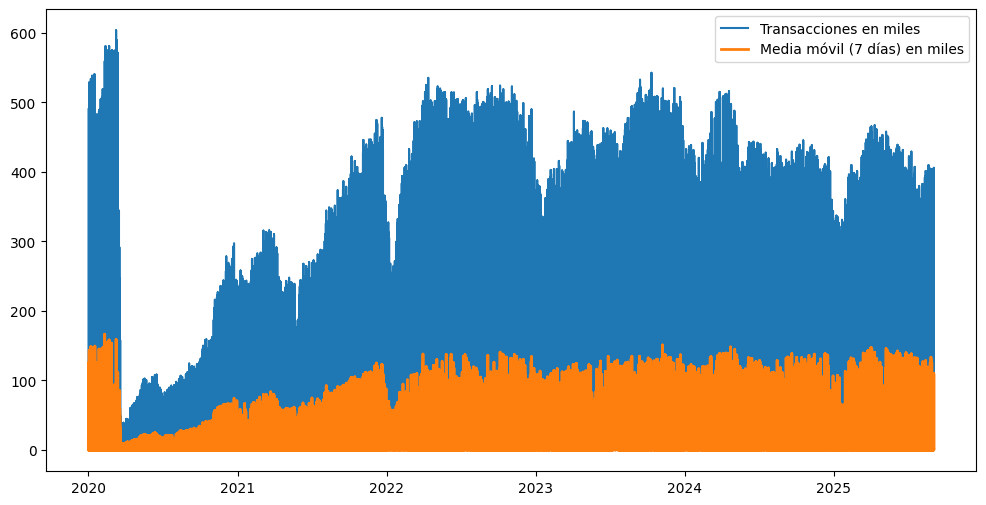

In [21]:
y1= df['cantidad'] / 1000
y2 = df['cantidad_mm7'] / 1000

plt.figure(figsize=(12,6))
plt.plot(df['date'], y1 , label='Transacciones en miles')
plt.plot(df['date'], y2 , label='Media móvil (7 días) en miles', linewidth=2)
plt.legend()
plt.show()


In [22]:
# number of transactions in 2025
total_transacciones = df['cantidad'].sum()
print("Total de transacciones en 2025:", total_transacciones)

Total de transacciones en 2025: 18806158680


In [23]:
# mean, max and min daily of transaction
diario = df.groupby('date')['cantidad'].sum()

promedio = diario.mean()
maximo = diario.max()
minimo = diario.min()
fecha_max = diario.idxmax()
fecha_min = diario.idxmin()

print(f'Promedio diario de transacciones: {round(promedio,0)}')
print(f'Fecha con más cantidad de viajes: {fecha_max.date()} (viajes: {round(maximo,0)})')
print(f'Fecha con menos cantidad de viajes: {fecha_min.date()}  (viajes: {round(minimo,0)})')

Promedio diario de transacciones: 9071953.0
Fecha con más cantidad de viajes: 2023-10-12 (viajes: 16488011)
Fecha con menos cantidad de viajes: 2021-11-14  (viajes: 546092)


In [24]:
# company with the most total transactions.
empresas = df.groupby('empresa')['cantidad'].sum()

# order by empresa
empresas = empresas.sort_values(ascending=False)

empresa_top = empresas.head(1)
print('Empresa con más transacciones totales: ', empresa_top.index[0])

Empresa con más transacciones totales:  SOFSE - Roca


In [25]:
# 5 most used companies in 2025
print(f'5 empresas más usadas en 2025: ')
lista_empresas = empresas.head(5).index.to_list()
for empresa in lista_empresas: 
    print(empresa)

5 empresas más usadas en 2025: 
SOFSE - Roca
TRANSPORTES LA PERLITA S.A. 
EMPRESA LINEA 216 S.A.T.
SOFSE- SARMIENTO
LA CABAÑA S.A.


In [26]:
# Comparison of the number of transactions between the first and second semesters
df['mes'] = df['date'].dt.month

# totals per semester
primer_semestre = df[df['mes'].between(1, 6)]['cantidad'].sum()
segundo_semestre = df[df['mes'].between(7, 12)]['cantidad'].sum()

print('Total de transacciones del primer semestre (Ene-Jun): ', primer_semestre)
print('Total de transacciones del segundo semestre (Jul-Dic): ', segundo_semestre)

# comparison
if primer_semestre > segundo_semestre:
    print('Hubo más transacciones en el primer semestre.')
elif segundo_semestre > primer_semestre:
    print('Hubo más transacciones en el segundo semestre.')
else:
    print('Ambos semestres tuvieron la misma cantidad de transacciones.')

Total de transacciones del primer semestre (Ene-Jun):  9515795252
Total de transacciones del segundo semestre (Jul-Dic):  9290363428
Hubo más transacciones en el primer semestre.


In [27]:
# transactions AMBA vs NO AMBA
# group by AMBA and count
transacciones_amba = df.groupby('amba')['cantidad'].sum()

print("Total de transacciones:")
print(transacciones_amba)

# in different variables
amba_total = transacciones_amba.get('SI', 0)
no_amba_total = transacciones_amba.get('NO', 0)

print(f'\nAMBA: {round(amba_total,0)}')
print(f'NO AMBA: {round(no_amba_total,0)}')

# percent
total = amba_total + no_amba_total
print(f'\n% AMBA: {round((amba_total/total)*100,2)}%')
print(f"% NO AMBA: {round((no_amba_total/total)*100,2)}%")

Total de transacciones:
amba
NO     3763391554
SI    15042767126
Name: cantidad, dtype: int64

AMBA: 15042767126
NO AMBA: 3763391554

% AMBA: 79.99%
% NO AMBA: 20.01%


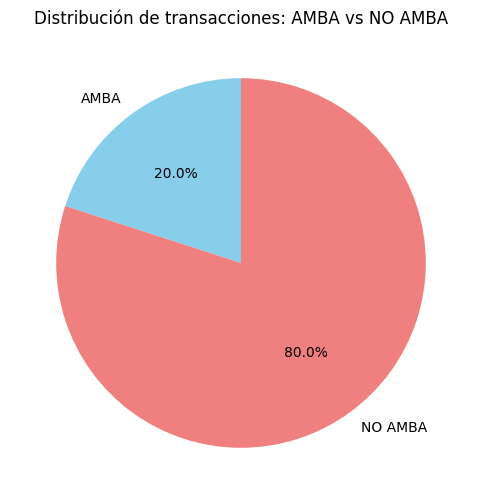

In [28]:
transacciones = df.groupby('amba')['cantidad'].sum()

plt.figure(figsize=(6,6))
plt.pie(
    transacciones,
    labels= ['AMBA', 'NO AMBA'],
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"]
)
plt.title('Distribución de transacciones: AMBA vs NO AMBA')
plt.show()

In [29]:
# Which jurisdiction (national, provincial, municipal) has the most trips?
# group by jurisdicción and calculate total trips 
viajes_jurisdiccion = df.groupby('jurisdiccion')['cantidad'].sum().sort_values(ascending=False)

print('Total de transacciones por jurisdicción:')
print(viajes_jurisdiccion)

# zone whit more trips
top = viajes_jurisdiccion.idxmax()
print(f'\n➡ La jurisdicción con más viajes es: {top}')

Total de transacciones por jurisdicción:
jurisdiccion
NACIONAL      7685214808
PROVINCIAL    6013644081
MUNICIPAL     4963977617
C.A.B.A        143322174
Name: cantidad, dtype: int64

➡ La jurisdicción con más viajes es: NACIONAL


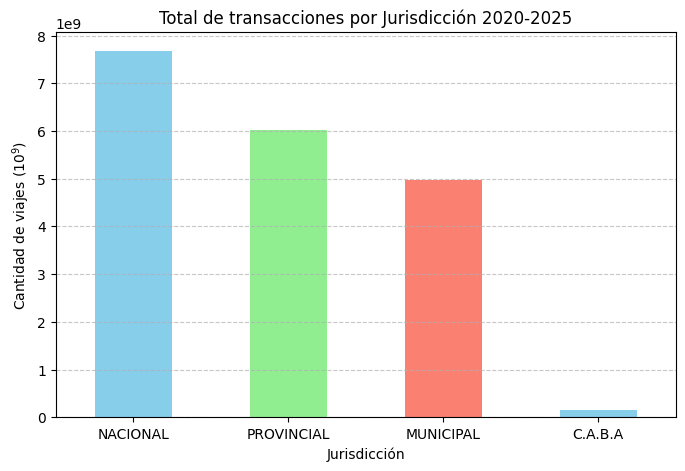

In [30]:
# Plot bars

plt.figure(figsize=(8,5))
viajes_jurisdiccion.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])


plt.title('Total de transacciones por Jurisdicción 2020-2025')
plt.xlabel('Jurisdicción')
plt.ylabel('Cantidad de viajes ($10^9$)')
plt.xticks(rotation=0)   # mantiene los nombres horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

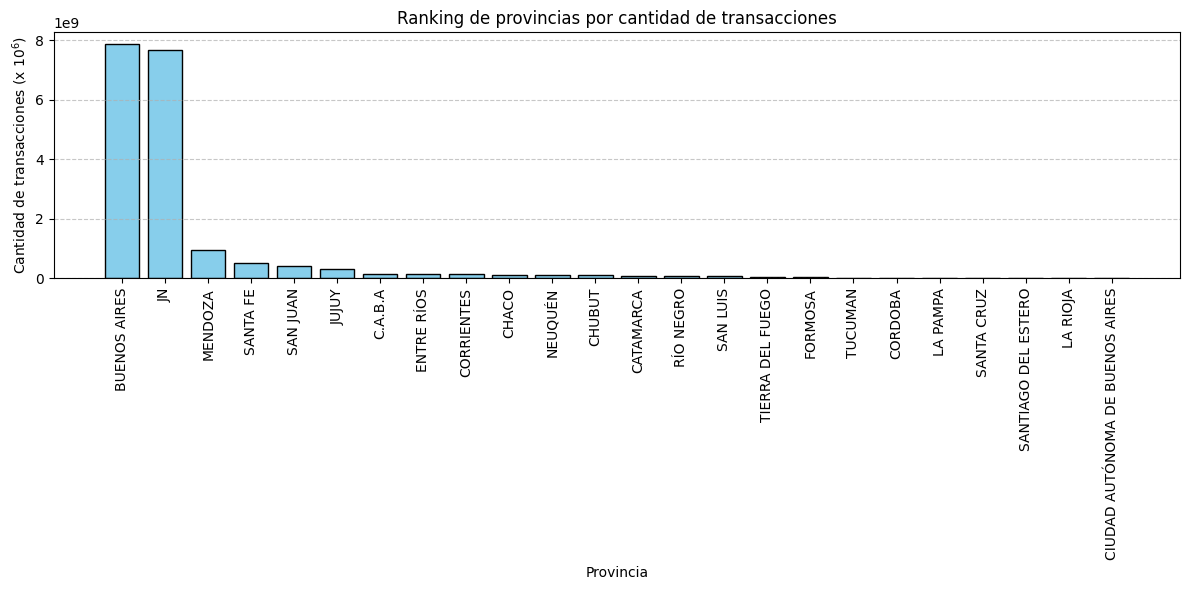

In [32]:
# Ranking of provinces with the highest number of transactions
# Group by province and calculate total transactions
ranking_provincias = (
    df.groupby('provincia')['cantidad']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

# Bar chart with Matplotlib
plt.figure(figsize=(12,6))
plt.bar(
    ranking_provincias['provincia'],
    ranking_provincias['cantidad'],
    color='skyblue',
    edgecolor='black'
)

# Personalization
plt.title('Ranking de provincias por cantidad de transacciones')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de transacciones (x $10^6$)')  # example with scale in millions
plt.xticks(rotation=90)   # rotate the names so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show chart
plt.tight_layout()
plt.show()

Analysis of the trend of the temporal set using Mann-Kendall

In [37]:
import pymannkendall as mk

# Daily serie
diario = df.groupby("date")["cantidad"].sum().reset_index()

# Serie diaria
serie = diario['cantidad'].values

resultado = mk.original_test(serie)

print('Resultado Mann-Kendall:\n')
print('Tendencia :', resultado.trend)
print('p-value   :', resultado.p)
print('Tau       :', resultado.Tau)
print('S         :', resultado.s)
print('Var(S)    :', resultado.var_s)
print('Z         :', resultado.z)


Resultado Mann-Kendall:

Tendencia : increasing
p-value   : 0.0
Tau       : 0.3334166811011963
S         : 716055.0
Var(S)    : 990533757.6666666
Z         : 22.75155761421406


The Mann–Kendall trend analysis applied to daily transport transactions between 2020 and 2025 provides robust statistical evidence of a significant upward trend in public transport usage. The test result indicating an increasing trend, together with a virtually zero p-value and a very high Z statistic, confirms that the observed pattern is not attributable to random variation. The Kendall’s Tau coefficient (~0.33) suggests a moderate but consistent positive trend, which is consistent with the progressive recovery of mobility following the sharp decline during the COVID-19 pandemic in 2020 and the subsequent steady increase in travel demand. Overall, the results demonstrate a clear and statistically significant recovery in transport transactions over the 2020–2025 period, highlighting a sustained growth in the utilization of the public transport system.